In [1]:
import pandas as pd
from datetime import timezone

In [2]:
sensors = pd.read_csv('sensors.csv')

In [3]:
sensors

,sds_sensor,bme_sensor,lat,lon,sealevel,surface_alt,surface_level,geometry,nearest_park,nearest_road,nearest_indust
0,43811,43812,55.703017,37.459441,198.129123,163.0,35.129123,POINT (37.45944073 55.70301725),708.707392,112.194727,1342.638505
1,46280,46281,55.677867,37.456325,179.383064,176.0,3.383064,POINT (37.4563253 55.677867),1658.169550,864.642229,1458.923855
2,33626,33627,55.874089,37.510001,167.849245,176.0,-8.150755,POINT (37.51000106 55.87408899),1425.563323,1014.471402,492.095085
3,54815,54816,55.752000,37.884000,229.558872,153.0,76.558872,POINT (37.884 55.752),1948.474417,478.007954,702.114877
4,45568,45569,55.625773,37.525268,263.580603,230.0,33.580603,POINT (37.5252682 55.62577293),1132.250738,1411.553491,2967.174366
...,...,...,...,...,...,...,...,...,...,...,...
169,41097,41098,55.563750,37.644380,169.422238,175.0,-5.577762,POINT (37.64437973 55.56375009),714.996265,1725.107884,563.984700
170,48427,48428,55.595953,37.598865,193.595497,172.0,21.595497,POINT (37.59886533 55.59595285),1970.871952,62.637976,1658.152326
171,35514,35515,55.650000,37.490000,222.317862,200.0,22.317862,POINT (37.49 55.65),316.934998,482.767891,3524.423023
172,51384,51385,55.682000,37.462000,242.403944,155.0,87.403944,POINT (37.462 55.682),1686.962530,860.689500,1176.061709


In [4]:
p1_med = pd.read_csv('../DATA/processed/dataset.csv', parse_dates=['date']).set_index('date').P1_p50
p2_med = pd.read_csv('../DATA/processed/dataset.csv', parse_dates=['date']).set_index('date').P2_p50

In [5]:
p2_med

date
2019-04-01 00:00:00+00:00    2.9575
2019-04-01 00:05:00+00:00    2.6900
2019-04-01 00:10:00+00:00    2.7600
2019-04-01 00:15:00+00:00    2.8400
2019-04-01 00:20:00+00:00    2.6175
                              ...  
2021-02-07 17:40:00+00:00       NaN
2021-02-07 17:45:00+00:00       NaN
2021-02-07 17:50:00+00:00       NaN
2021-02-07 17:55:00+00:00       NaN
2021-02-07 18:00:00+00:00       NaN
Name: P2_p50, Length: 195481, dtype: float64

In [6]:
def get_diff(sds_id):
    try:
        file_name = f'{sds_id}_sds011_sensor_.csv'
        sds_data = pd.read_csv('../DATA/raw/sensors/'+file_name, sep=';', parse_dates=['timestamp'])
        sds_data = sds_data.set_index('timestamp').resample('5T').mean()
        sds_data = sds_data.tz_localize(timezone.utc)
        return (sds_data.P1 - p1_med).median(), (sds_data.P2 - p2_med).median()
    except:
        return None, None

In [7]:
p1_diff = []
p2_diff = []
for index, row in sensors.iterrows():
    p1, p2 = get_diff(int(row['sds_sensor']))
    p1_diff.append(p1)
    p2_diff.append(p2)
    
sensors['p1_diff'] = p1_diff
sensors['p2_diff'] = p2_diff

//home/anatoly/HDD/anaconda3/envs/mlforair/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
sensors

,sds_sensor,bme_sensor,lat,lon,sealevel,surface_alt,surface_level,geometry,nearest_park,nearest_road,nearest_indust,p1_diff,p2_diff
0,43811,43812,55.703017,37.459441,198.129123,163.0,35.129123,POINT (37.45944073 55.70301725),708.707392,112.194727,1342.638505,-3.2100,-2.316875
1,46280,46281,55.677867,37.456325,179.383064,176.0,3.383064,POINT (37.4563253 55.677867),1658.169550,864.642229,1458.923855,-1.3000,-0.250000
2,33626,33627,55.874089,37.510001,167.849245,176.0,-8.150755,POINT (37.51000106 55.87408899),1425.563323,1014.471402,492.095085,5.1850,0.833333
3,54815,54816,55.752000,37.884000,229.558872,153.0,76.558872,POINT (37.884 55.752),1948.474417,478.007954,702.114877,1.4100,-1.250000
4,45568,45569,55.625773,37.525268,263.580603,230.0,33.580603,POINT (37.5252682 55.62577293),1132.250738,1411.553491,2967.174366,-0.6050,-0.275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,41097,41098,55.563750,37.644380,169.422238,175.0,-5.577762,POINT (37.64437973 55.56375009),714.996265,1725.107884,563.984700,1.6525,1.317143
170,48427,48428,55.595953,37.598865,193.595497,172.0,21.595497,POINT (37.59886533 55.59595285),1970.871952,62.637976,1658.152326,0.9325,-0.525000
171,35514,35515,55.650000,37.490000,222.317862,200.0,22.317862,POINT (37.49 55.65),316.934998,482.767891,3524.423023,-1.5375,-0.535000
172,51384,51385,55.682000,37.462000,242.403944,155.0,87.403944,POINT (37.462 55.682),1686.962530,860.689500,1176.061709,2.1800,0.837000


In [9]:
sensors.plot.scatter('sealevel', 'p1_diff'), sensors.plot.scatter('surface_level', 'p1_diff')

(<AxesSubplot:xlabel='sealevel', ylabel='p1_diff'>,
 <AxesSubplot:xlabel='surface_level', ylabel='p1_diff'>)

(<AxesSubplot:xlabel='sealevel', ylabel='p2_diff'>,
 <AxesSubplot:xlabel='surface_level', ylabel='p2_diff'>)

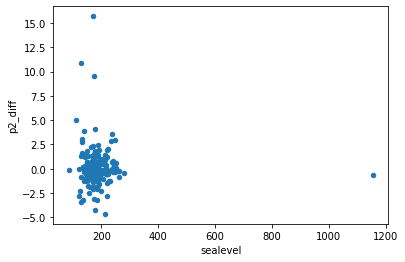

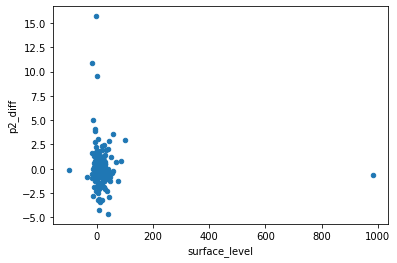

In [10]:
sensors.plot.scatter('sealevel', 'p2_diff'), sensors.plot.scatter('surface_level', 'p2_diff')

In [11]:
sensors[['sealevel','surface_level', 'surface_alt', 'p1_diff', 'p2_diff']].corr()

,sealevel,surface_level,surface_alt,p1_diff,p2_diff
sealevel,1.000000,0.953761,0.339041,-0.058718,-0.048547
surface_level,0.953761,1.000000,0.040600,-0.062590,-0.052629
surface_alt,0.339041,0.040600,1.000000,0.000953,0.003566
p1_diff,-0.058718,-0.062590,0.000953,1.000000,0.813942
p2_diff,-0.048547,-0.052629,0.003566,0.813942,1.000000


In [12]:
len(sensors)

174

(<AxesSubplot:xlabel='nearest_park', ylabel='p1_diff'>,
 <AxesSubplot:xlabel='nearest_road', ylabel='p1_diff'>,
 <AxesSubplot:xlabel='nearest_indust', ylabel='p1_diff'>)

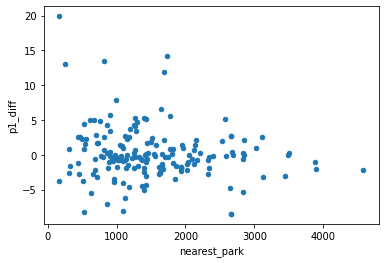

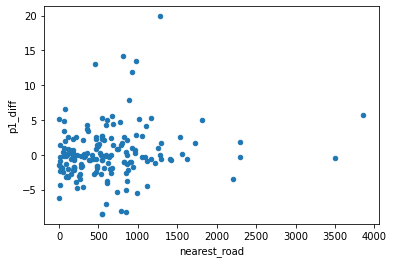

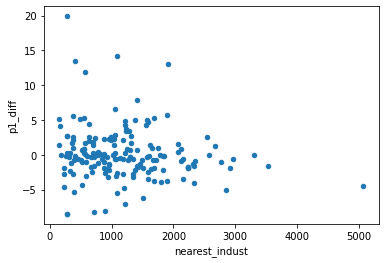

In [14]:
sensors.plot.scatter('nearest_park', 'p1_diff'), sensors.plot.scatter('nearest_road', 'p1_diff'), sensors.plot.scatter('nearest_indust', 'p1_diff')

(<AxesSubplot:xlabel='nearest_park', ylabel='p2_diff'>,
 <AxesSubplot:xlabel='nearest_road', ylabel='p2_diff'>,
 <AxesSubplot:xlabel='nearest_indust', ylabel='p2_diff'>)

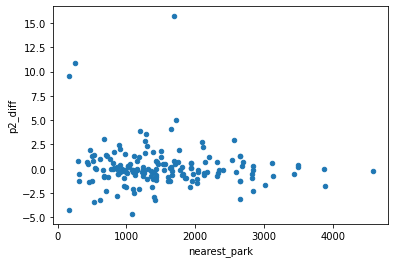

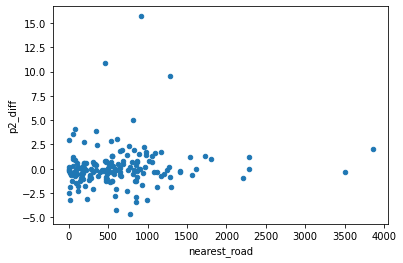

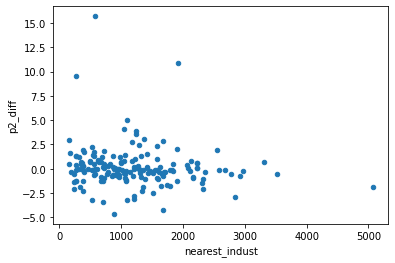

In [15]:
sensors.plot.scatter('nearest_park', 'p2_diff'), sensors.plot.scatter('nearest_road', 'p2_diff'), sensors.plot.scatter('nearest_indust', 'p2_diff')